## 5. Limpieza de los datos

Tras es análisis de la variables hemos detectado tanto duplicidades en los datos como presencia de datos faltantes. Procedemos a la limpieza de los datos para la posterior construcción de un modelo mas exacto. 

### 5.1 Eliminacion de duplicados

En el análisis de las variables cualitativas obsevamos que algunos datos tenian la misma dirección y precio.
Basandonos en este razonamiento, realizamos una funcion que  elimine las filas que tengan las variables 'Address','SellerG','Price' y 'Date'   iguales. 


Numero de duplicados que hay??

In [ ]:
import pandas as pd 
import numpy as np
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, geom_boxplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pwlf
data= pd.read_csv('/home/inma/HH_intro_git_ds/Melbourne_housing_FULL.csv')
import fundamentos_datos.py

In [ ]:
esDeProporcion(-1)
esAcotada(-1,100)
clasificar_variables(data)

In [2]:
def eliminar_duplicados(dataframe_bueno):
    import pdb;pdb.set_trace()
    duplicateRowsDF=pd.DataFrame()
    duplicateRowsDF = dataframe_bueno[dataframe_bueno.duplicated(['Suburb', 'Address','Postcode','CouncilArea',],keep=False)]
    duplicateRowsDF=duplicateRowsDF.drop_duplicates(subset=['Address','SellerG','Price','Date'])
    duplicateRowsDF=duplicateRowsDF.dropna(subset=['Price'])
    dataframe_bueno=dataframe_bueno.drop_duplicates(subset=['Address','Suburb'], keep=False, ignore_index=True)# por que lo haces de nuevo??
    dataframe_bueno=pd.concat([dataframe_bueno, duplicateRowsDF], axis=1,join='inner')
    dataframe_bueno=dataframe_bueno.dropna(subset=['Price'])
    dataframe_bueno=dataframe_bueno.reset_index(drop=True)
    return(dataframe_bueno)

In [ ]:
data_duplicados=eliminar_duplicados(data)
#data_duplicados.head()
print(len(data_duplicados))
print(len(data))

### 5.2 Detección e Imputación de Datos Faltantes

Una vez eliminiados los datos duplicados, para finalizar la preparación de los datos es necesario eliminar los datos faltantes. 

Para ellos en primer lugar representamos gráficamente los datos faltantes en cada una de las variables realizando  una función de visualización. 


In [4]:
def visualizacion_missings(dataframe):
    #ELIMINACION VISUALIZACION Y SUSTITUCION DE LOS MISSINGS
    print(dataframe.isnull().sum())
    msno.matrix(dataframe)
    plt.show()
    msno.heatmap(dataframe)
    plt.show()
    # Missingno library also provides heatmaps that show if there is any correlation between missing values in different columns.
    msno.bar(dataframe)
    plt.show()
'''import pdb;pdb.set_trace()
lista_true=[[5,7,9,11,13],[2,4,6,8,10]]
lista_pred=[[19/4,40/6,8,12,13],[5/2,7/2,13/2,17/2,9]]
ec_prueba=error_cuadratico(lista_true,lista_pred)'''



'import pdb;pdb.set_trace()\nlista_true=[[5,7,9,11,13],[2,4,6,8,10]]\nlista_pred=[[19/4,40/6,8,12,13],[5/2,7/2,13/2,17/2,9]]\nec_prueba=error_cuadratico(lista_true,lista_pred)'

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2         130
Bathroom         130
Car              134
Landsize         185
BuildingArea     346
YearBuilt        308
CouncilArea        0
Lattitude        126
Longtitude       126
Regionname         0
Propertycount      0
Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2         127
Bathroom         127
Car              132
Landsize         169
BuildingArea     306
YearBuilt        289
CouncilArea        0
Lattitude        123
Longtitude       123
Regionname         0
Propertycount      0
dtype: int64


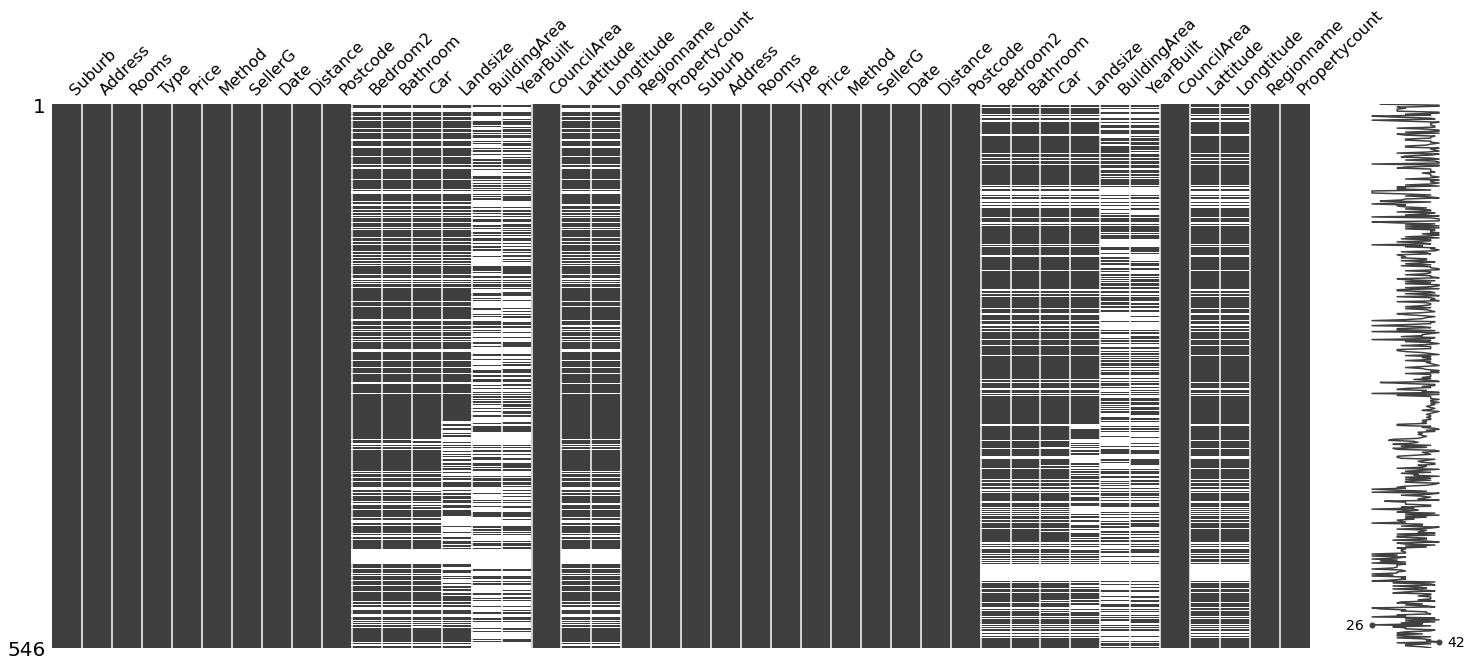

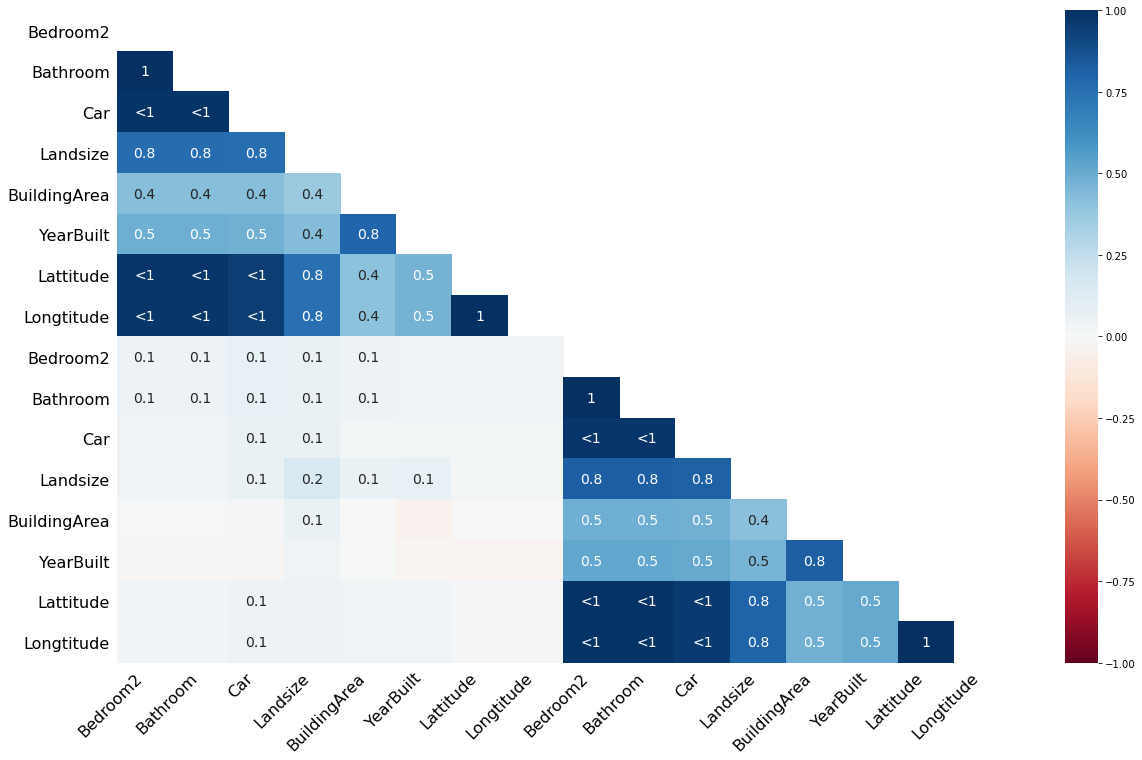

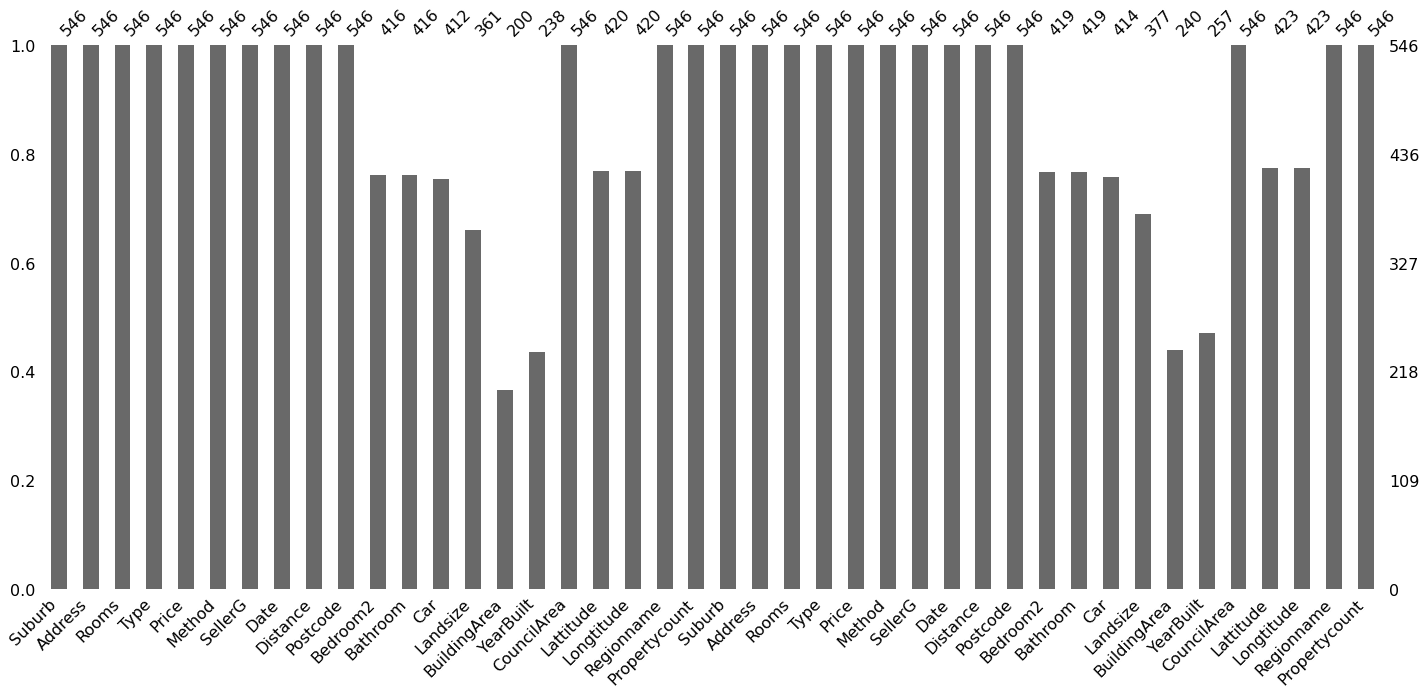

In [5]:
visualizacion_missings(data_duplicados)

Se detecta que hay variables donde no existen datos faltantes mientras que en otras el número es muy alto. En este punto es importante seleccionar de forma adecuada la imputación de los mismo. 

Directamente descargamos las variables "YearBuilt", "BuildingArea" y "Bedroom2" ya que presentan muchos datos faltantes además de una baja correlación y/o muchas similitud con otras variables como en el caso de "Bedrooms2" y **"Bedrooms"**. 

 De lo otro no me acuerdo qe has hecho ni lo entiendo. 

In [ ]:
dataframe = pd.read_csv('/home/inma/HH_intro_git_ds/precios_casas_full.csv')
dataframe_bueno=pd.DataFrame()
#dataframe=dataframe[dataframe.BuildingArea.drop()]
dataframe_final=pd.DataFrame()
import pdb;pdb.set_trace()
#dataframe=dataframe.dropna(subset=['Price'])
for i in dataframe.keys():
    if(i!='YearBuilt' and i!='BuildingArea' and i!='Bedroom2'):
        dataframe_final[i]=dataframe[i]
dataframe=dataframe_final
lista_parametros=list()
lista_missings=list()
for index, i in enumerate(dataframe.keys()):
    if(isinstance(dataframe.iloc[0][index], ( np.int64))  or isinstance(dataframe.iloc[0][index],(np.float64)) ):
        if(dataframe[str(i)].isna().sum()>1000):
            lista_missings.append(i)
        else:
            lista_parametros.append(i)

--Return--
None
> <ipython-input-6-085acfb8aafa>(5)<module>()
      3 #dataframe=dataframe[dataframe.BuildingArea.drop()]
      4 dataframe_final=pd.DataFrame()
----> 5 import pdb;pdb.set_trace()
      6 #dataframe=dataframe.dropna(subset=['Price'])
      7 for i in dataframe.keys():



In [ ]:
dataframe_bueno.head()